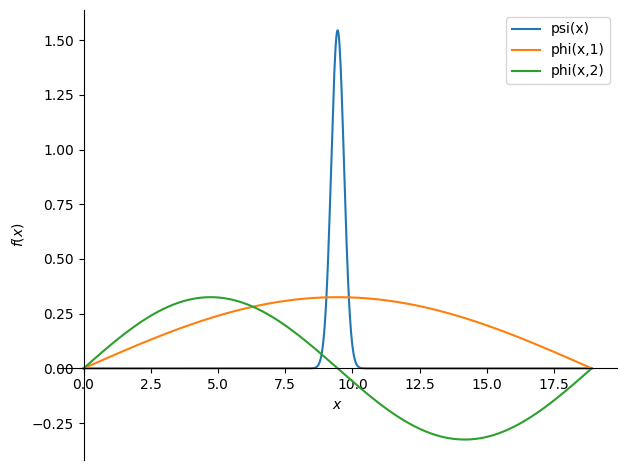

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import plot, symbols, sqrt, pi, exp, sin
import scipy.integrate

# A bit of helper code for doing integration of complex-valued functions
# This function provides a convenient way to integrate the function "func" from x
def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    
    return real_integral[0] + 1j * imag_integral[0]

ANGSTROMS_TO_BOHR = 0.529177 # angstrom in atomic units
HBAR = 1 # hbar in atomic units
M = 1 # mass in atomic units
A = 8 * ANGSTROMS_TO_BOHR # value of a in atomic units
L = 10 / ANGSTROMS_TO_BOHR # value of L in atomic units

x, n = symbols('x n')
psi = (A**2 / pi)**(1/4) * exp(-A**2 * (x - L/2)**2 / 2)
phi = sqrt(2 / L) * sin(n * pi * x / L)

p=plot(psi, phi.subs(n,1), phi.subs(n,2), (x,0,L), legend=True, show=False)
p[0].label="psi(x)"
p[1].label="phi(x,1)"
p[2].label="phi(x,2)"
p.show()


In [9]:
from sympy import lambdify

NSTATES = 50 # number of basis states in the expansion

c = np.zeros(NSTATES+1, dtype=np.cdouble) # (complex) zero array in NumPy format to store the overlaps with the basis functions

for i in range(1, NSTATES + 1):
    integrand = lambdify(x, psi * phi.subs(n, i))  # Convert SymPy expression into a function
    c[i] = complex_quadrature(integrand, 0, L) # overlap of psi and phi_n

print(["n", "c[n]"])
for i in range(1, NSTATES + 1):
    print([i, c[i]])


['n', 'c[n]']
[1, np.complex128(0.588091053455754+0j)]
[2, np.complex128(3.788735381302336e-18+0j)]
[3, np.complex128(-0.5328211128788417+0j)]
[4, np.complex128(1.881433243180086e-17+0j)]
[5, np.complex128(0.43737618354077545+0j)]
[6, np.complex128(-6.879747376918573e-17+0j)]
[7, np.complex128(-0.32528623723245687+0j)]
[8, np.complex128(9.29004657369749e-17+0j)]
[9, np.complex128(0.2191861455825353+0j)]
[10, np.complex128(1.1572373436414389e-17+0j)]
[11, np.complex128(-0.1338127090437593+0j)]
[12, np.complex128(-4.9360045161990726e-17+0j)]
[13, np.complex128(0.07401478455240758+0j)]
[14, np.complex128(1.004223954065295e-15+0j)]
[15, np.complex128(-0.037091675204695904+0j)]
[16, np.complex128(8.235780429579167e-17+0j)]
[17, np.complex128(0.016841131610571138+0j)]
[18, np.complex128(2.077853957463951e-16+0j)]
[19, np.complex128(-0.006927921277414842+0j)]
[20, np.complex128(-6.127003990326947e-16+0j)]
[21, np.complex128(0.0025820905670517055+0j)]
[22, np.complex128(2.202009582729252e-15+0

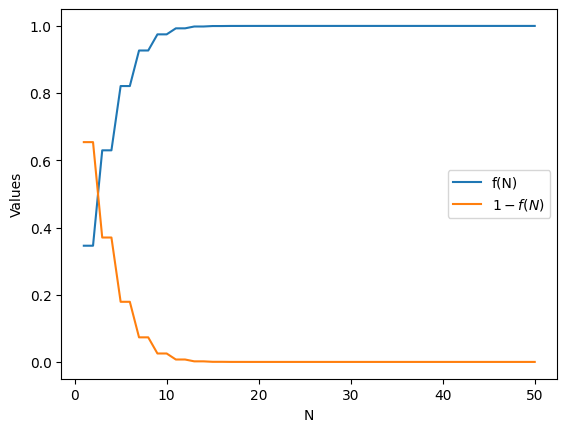

For N = 50, f(N) is 1.000000.


In [32]:
def cumulative_probability(N):
    prob = 0
    for i in range(1, N + 1):
        prob += np.real(c[i] * np.conj(c[i]))
    return prob

# Generate x values
xvalue = range(1, NSTATES + 1)  # Include the upper bound NSTATES

# Calculate cumulative probability for each N
probabilities = [cumulative_probability(N) for N in xvalue]

# Plot the cumulative probability density
plt.plot(xvalue, probabilities, label='f(N)')
plt.plot(xvalue, [1 - p for p in probabilities], label='$1 - f(N)$')  # Correctly calculate 1 - probabilities
plt.xlabel('N')
plt.ylabel('Values')
plt.legend()
plt.show()

print("For N = %d, f(N) is %f." % (NSTATES, cumulative_probability(NSTATES)))


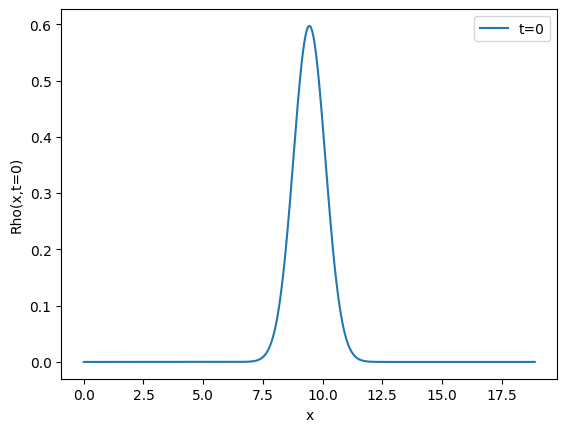

In [33]:
from sympy import Array, Sum, Symbol, conjugate, re

E = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) # energies of the basis states

t=Symbol('t') # time 
c=Array(c) #convert the Numpy array of expansion coefficients into a Sympy array
#First construct the wavefunction at time t=0, and the corresponding probability
psi0 = Sum(c[n]*phi,(n,1,NSTATES))
rho0 = re(psi0 * conjugate(psi0))

rho0_lambda = lambdify(x, rho0)

xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.xlabel('x')
plt.ylabel('Rho(x,t=0)')
plt.legend()
plt.show()

In [3]:
from sympy import I


psit = Sum(c[n]*phi*exp(-I*E*t),(n,1,NSTATES))
rhot = re(psit * conjugate(psit))
#create a REAL Python function out of the SymPy expression to make it MUCH faste
rhot_lambda = lambdify([x,t], rhot)
#Print the value of the wavefunction at several times
xvals = np.arange(0.0, L, 0.01)

plt.plot(xvals, rhot_lambda(xvals,0), label='t=0')
plt.plot(xvals, rhot_lambda(xvals,0.25), label='t=0.25')
plt.plot(xvals, rhot_lambda(xvals,0.5), label='t=0.5')
plt.plot(xvals, rhot_lambda(xvals,1.0), label='t=1.0')
plt.plot(xvals, rhot_lambda(xvals,1.5), label='t=1.5')
plt.xlabel('x')
plt.ylabel('Rho(x,t)')
plt.legend()
plt.show()

NameError: name 'Sum' is not defined

In [2]:
from sympy import integrate


xt = integrate(rhot*x, (x,0,L))
xt_lambda = np.vectorize(lambdify(t,xt))
tvals=np.arange(0,1.5,0.01)
plt.plot(tvals,xt_lambda(tvals))
plt.ylim(0,L)
plt.legend()

NameError: name 'rhot' is not defined

In [1]:
xt = integrate(rhot * (x-L/2)**2, (x,0,L))
xt_lambda = np.vectorize(lambdify(t,xt))
tvals=np.arange(0,1.5,0.01)
plt.plot(tvals,xt_lambda(tvals))
plt.ylim(0,L)
plt.legend()

NameError: name 'integrate' is not defined

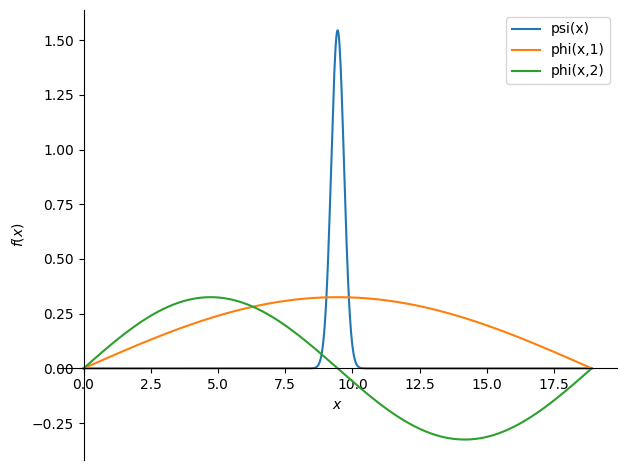

['n', 'c[n]']
[1, np.complex128(0.29746618385884294+0j)]
[2, np.complex128(8.694320277394995e-17+0j)]
[3, np.complex128(-0.29563691062434627+0j)]
[4, np.complex128(-1.7388643326042481e-16+0j)]
[5, np.complex128(0.2920120424168867+0j)]
[6, np.complex128(2.608297110891297e-16+0j)]
[7, np.complex128(-0.28665790447275+0j)]
[8, np.complex128(-3.4777306281790105e-16+0j)]
[9, np.complex128(0.2796714505507121+0j)]
[10, np.complex128(4.3471649652955863e-16+0j)]
[11, np.complex128(-0.2711773431349046+0j)]
[12, np.complex128(-5.216599758514133e-16+0j)]
[13, np.complex128(0.2613242551308872+0j)]
[14, np.complex128(3.130839521468702e-15+0j)]
[15, np.complex128(-0.25028054628035135+0j)]
[16, np.complex128(-6.955469466193526e-16+0j)]
[17, np.complex128(0.23822948976522892+0j)]
[18, np.complex128(7.824904334466829e-16+0j)]
[19, np.complex128(-0.22536423759094326+0j)]
[20, np.complex128(-8.694338660036519e-16+0j)]
[21, np.complex128(0.21188271692497046+0j)]
[22, np.complex128(3.4786133085649884e-15+0j)

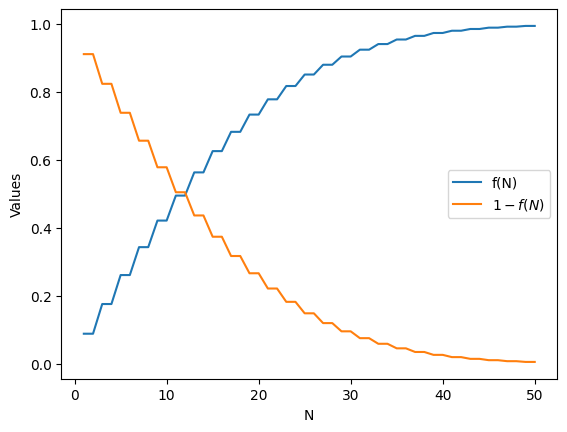

For N = 50, f(N) is 0.994534.


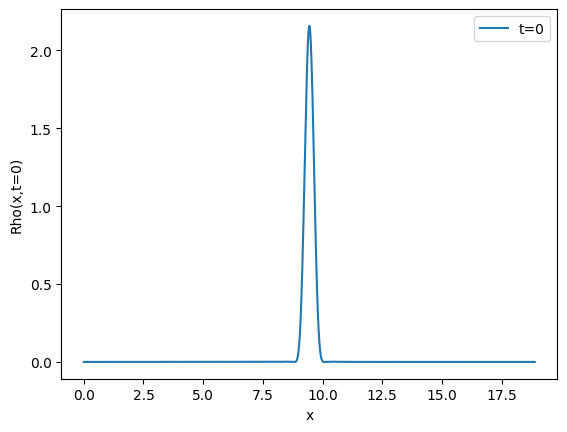

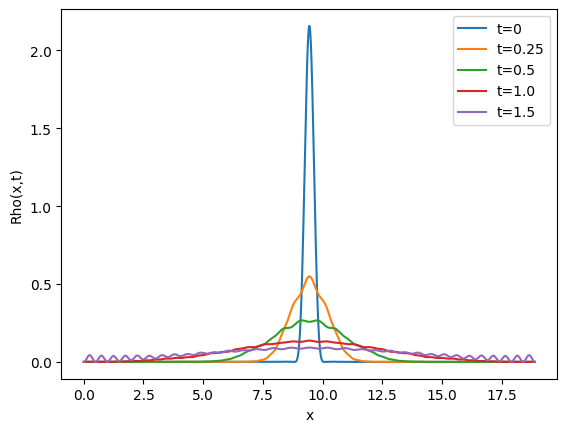

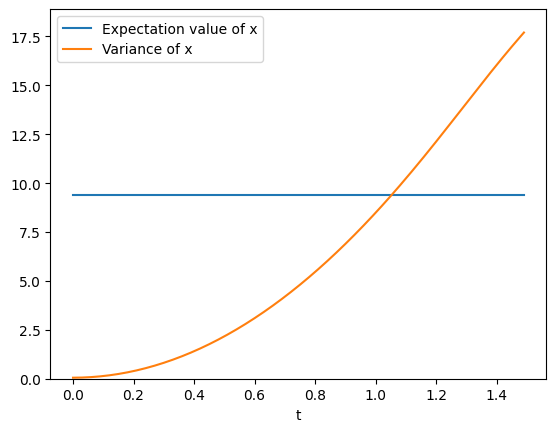

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import integrate, I, plot, symbols, sqrt, pi, exp, sin, lambdify,  Array, Sum, Symbol, conjugate, re
import scipy.integrate

# A bit of helper code for doing integration of complex-valued functions
# This function provides a convenient way to integrate the function "func" from x
def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    
    return real_integral[0] + 1j * imag_integral[0]

ANGSTROMS_TO_BOHR = 0.529177 # angstrom in atomic units
HBAR = 1 # hbar in atomic units
M = 1 # mass in atomic units
A = 8 * ANGSTROMS_TO_BOHR # value of a in atomic units
L = 10 / ANGSTROMS_TO_BOHR # value of L in atomic units

x, n = symbols('x n')
psi = (A**2 / pi)**(1/4) * exp(-A**2 * (x - L/2)**2 / 2)
phi = sqrt(2 / L) * sin(n * pi * x / L)

p=plot(psi, phi.subs(n,1), phi.subs(n,2), (x,0,L), legend=True, show=False)
p[0].label="psi(x)"
p[1].label="phi(x,1)"
p[2].label="phi(x,2)"
p.show()



NSTATES = 50 # number of basis states in the expansion

c = np.zeros(NSTATES+1, dtype=np.cdouble) # (complex) zero array in NumPy format to store the overlaps with the basis functions

for i in range(1, NSTATES + 1):
    integrand = lambdify(x, psi * phi.subs(n, i))  # Convert SymPy expression into a function
    c[i] = complex_quadrature(integrand, 0, L) # overlap of psi and phi_n

print(["n", "c[n]"])
for i in range(1, NSTATES + 1):
    print([i, c[i]])
    

def cumulative_probability(N):
    prob = 0
    for i in range(1, N + 1):
        prob += np.real(c[i] * np.conj(c[i]))
    return prob

# Generate x values
xvalue = range(1, NSTATES + 1)  # Include the upper bound NSTATES

# Calculate cumulative probability for each N
probabilities = [cumulative_probability(N) for N in xvalue]

# Plot the cumulative probability density
plt.plot(xvalue, probabilities, label='f(N)')
plt.plot(xvalue, [1 - p for p in probabilities], label='$1 - f(N)$')  # Correctly calculate 1 - probabilities
plt.xlabel('N')
plt.ylabel('Values')
plt.legend()
plt.show()

print("For N = %d, f(N) is %f." % (NSTATES, cumulative_probability(NSTATES)))


E = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) # energies of the basis states

t=Symbol('t') # time 
c=Array(c) #convert the Numpy array of expansion coefficients into a Sympy array
#First construct the wavefunction at time t=0, and the corresponding probability
psi0 = Sum(c[n]*phi,(n,1,NSTATES))
rho0 = re(psi0 * conjugate(psi0))

rho0_lambda = lambdify(x, rho0)

xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.xlabel('x')
plt.ylabel('Rho(x,t=0)')
plt.legend()
plt.show()


psit = Sum(c[n]*phi*exp(-I*E*t),(n,1,NSTATES))
rhot = re(psit * conjugate(psit))
#create a REAL Python function out of the SymPy expression to make it MUCH faste
rhot_lambda = lambdify([x,t], rhot)
#Print the value of the wavefunction at several times
xvals = np.arange(0.0, L, 0.01)

plt.plot(xvals, rhot_lambda(xvals,0), label='t=0')
plt.plot(xvals, rhot_lambda(xvals,0.25), label='t=0.25')
plt.plot(xvals, rhot_lambda(xvals,0.5), label='t=0.5')
plt.plot(xvals, rhot_lambda(xvals,1.0), label='t=1.0')
plt.plot(xvals, rhot_lambda(xvals,1.5), label='t=1.5')
plt.xlabel('x')
plt.ylabel('Rho(x,t)')
plt.legend()
plt.show()

xt = integrate(rhot*x, (x,0,L))
xt_lambda = np.vectorize(lambdify(t,xt))
tvals = np.arange(0, 1.5, 0.01)
plt.plot(tvals, xt_lambda(tvals), label='Expectation value of x')
plt.xlabel('t')
plt.ylim(0, L)
plt.legend()

xt = integrate(rhot * (x-L/2)**2, (x,0,L))
xt_lambda = np.vectorize(lambdify(t,xt))
tvals = np.arange(0, 1.5, 0.01)
plt.plot(tvals, xt_lambda(tvals), label='Variance of x')
plt.ylim(0, L)
plt.legend()